##QUESTIONS on EDA (EDA-1: Bike Details Dataset)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('BIKE DETAILS.csv')
df.head()

Que1: What is the range of selling prices in the dataset?

In [ ]:
#Ans1:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

# This will load the dataset
df = pd.read_csv('BIKEDETAILS.csv')

# Display the first few rows
print(df.head())

# This will calculate and print the range of selling prices
if 'selling_price' in df.columns:
    price_range = df['selling_price'].max() - df['selling_price'].min()
    print("Range of selling prices:", price_range)
else:
    print("Column 'selling_price' not found in the dataset.")

Saving BIKEDETAILS.csv to BIKEDETAILS.csv
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  
Range of selling prices: 755000


Que2: What is the median selling price for bikes in the dataset?

In [ ]:
#Ans2:
median_price = df['selling_price'].median()
print("Median selling price:", median_price)

Median selling price: 45000.0


Que3: What is the most common seller type?

In [ ]:
#Ans3:
common_seller = df['seller_type'].mode()[0]
print("Most common seller type:", common_seller)

Most common seller type: Individual


Que4: How many bikes have driven more than 50,000 kilometers?

In [ ]:
#Ans4:
high_km_bikes = df[df['km_driven'] > 50000].shape[0]
print("Bikes with >50,000 km driven:", high_km_bikes)

Bikes with >50,000 km driven: 170


Que5: What is the average km_driven value for each ownership type?

In [ ]:
#Ans5:
avg_km_by_ownership = df.groupby('ownership')['km_driven'].mean()
print("Average km driven by ownership:\n", avg_km_by_ownership)

Que6: What proportion of bikes are from the year 2015 or older?

In [ ]:
#Ans6:
proportion_old_bikes = (df['year'] <= 2015).mean()
print("Proportion of bikes from 2015 or older:", proportion_old_bikes)

Que7: What is the trend of missing values across the dataset?

In [ ]:
#Ans7:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Que8: What is the highest ex_showroom_price recorded, and for which bike?

In [ ]:
#Ans8:
max_price_row = df.loc[df['ex_showroom_price'].idxmax()]
print("Bike with highest ex_showroom_price:\n", max_price_row[['name', 'ex_showroom_price']])

Que9: What is the total number of bikes listed by each seller type?

In [ ]:
#Ans9:
bikes_by_seller = df['seller_type'].value_counts()
print("Number of bikes by seller type:\n", bikes_by_seller)

Que10: What is the relationship between selling_price and km_driven for first-owner bikes?

In [ ]:
#Ans10:
first_owner_df = df[df['ownership'].str.contains("First", na=False)]
sns.scatterplot(data=first_owner_df, x='km_driven', y='selling_price')
plt.title("Selling Price vs KM Driven (First Owner)")
plt.show()

Que11: Identify and remove outliers in the km_driven column using the IQR method

In [ ]:
#Ans11:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
df_no_outliers.shape

Que12: Perform a bivariate analysis to visualize the relationship between year and selling_price

In [ ]:
#Ans12:
sns.boxplot(x='year', y='selling_price', data=df)
plt.xticks(rotation=45)
plt.title("Year vs Selling Price")
plt.show()

Que13: What is the average depreciation in selling price based on the bike's age

In [ ]:
#Ans13:
current_year = 2025
df['age'] = current_year - df['year']
avg_depreciation = df.groupby('age')['selling_price'].mean()
print("Average selling price by age:\n", avg_depreciation)

Que14: Which bike names are priced significantly above the average price for their manufacturing year (current year - manufacturing
year)?

In [ ]:
#Ans14:
grouped = df.groupby('year')['selling_price']
thresholds = grouped.transform(lambda x: x.mean() + 2 * x.std())
high_price_bikes = df[df['selling_price'] > thresholds]
print("Bikes priced significantly above average:\n", high_price_bikes[['name', 'year', 'selling_price']])

Bikes priced significantly above average:
                                      name  year  selling_price
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
52              Royal Enfield Electra 5 S  2010          90000
134            Harley-Davidson Street Bob  2013         750000
137          KTM 390 Duke ABS [2013-2016]  2015         130000
161    Royal Enfield Classic Desert Storm  2012         100000
208              Royal Enfield Bullet 500  2015         130000
224  Royal Enfield Bullet 350 [2007-2011]  2007          90000
242                            KTM RC 390  2017         210000
286    Royal Enfield Classic Desert Storm  2015         130000
289        Kawasaki Ninja 650 [2018-2019]  2017         425000
291                   Kawasaki Ninja 250R  2010         125000
295                       Suzuki GSX S750  2019         760000
306                             Yamaha Rx  2000          70000
311         

Que15: Develop a correlation matrix for numeric columns and visualize it using a heatmap.

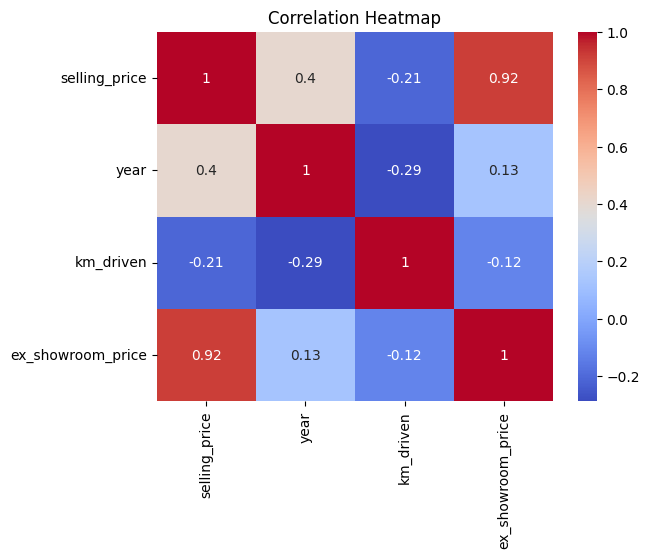

In [ ]:
#Ans15:
corr_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()